In [2]:
import numpy as np 
import pandas as pd 
from scipy import linalg
import matplotlib.pyplot as pl
import plotly.express as px
import plotly.graph_objects as go
import watermark
import seaborn as sns

np.random.seed(100) 

In [11]:
assay = pd.read_csv("Kevitsa_data//Drilling data FQML/assays_ME.Kevitsa-20140826.csv")
collar = pd.read_csv("Kevitsa_data//Drilling data FQML/collars.Kevitsa-20140826.csv")
density = pd.read_csv("Kevitsa_data/Petrophysics/density_dh.Kevitsa_20141209.csv")



C:\Users\23478671\AppData\Local\Temp\ipykernel_1696\3407020455.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  assay = pd.read_csv("Kevitsa_data//Drilling data FQML/assays_ME.Kevitsa-20140826.csv")


In [67]:
one_composite = pd.read_csv("Curated_data/Kevitsa_composites_1m.csv", low_memory=False)
two_composite = pd.read_csv("Curated_data/Kevitsa_composites_2m.csv", low_memory=False)

In [66]:
two_composite


,Sample Number,Name,Depth From,Depth To,X,Y,Z,Length,Ag_ppm,Al_pct,...,Vein1_Pct,Vein1_Style,Vein2_Comp,Vein2_Pct,Vein2_Style,W_ppm,Weathering,Y_ppm,Zn_ppm,Zr_ppm
0,1,KEV_1,0.0,2.0,3498947.63,7511204.97,236.38,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,KEV_1,2.0,4.0,3498948.84,7511204.92,234.79,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,KEV_1,4.0,6.0,3498950.05,7511204.87,233.20,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,KEV_1,6.0,8.0,3498951.26,7511204.82,231.61,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,KEV_1,8.0,10.0,3498952.47,7511204.77,230.01,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97858,97859,R728,96.0,98.0,3498735.00,7510855.00,116.50,2.0,0.51,1.39,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.24,5.13,NaN
97859,97860,R728,98.0,100.0,3498735.00,7510855.00,114.50,2.0,0.25,1.67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.48,7.87,NaN
97860,97861,R728,100.0,102.0,3498735.00,7510855.00,112.50,2.0,0.38,1.46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.56,8.55,NaN
97861,97862,R728,102.0,104.0,3498735.00,7510855.00,110.50,2.0,0.16,1.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.41,7.94,NaN


In [68]:
list1 = one_composite.columns
for i in list1:
    print(i)

Sample Number
Name
Depth From
Depth To
X
Y
Z
Length
Ag_ppm
Al_pct
Alt1_Code
Alt1_Int
Alt1_Style
Alt2_Code
Alt2_Int
Alt2_Style
Ars_ppm
Au_ppb
B_ppm
Ba_ppm
Be_ppm
Bi_ppm
Ca_pct
Cd_ppm
Ce_ppm
Cl_ppm
Co_ppm
Comments
Core_Angle
Core_Diameter
CoreLoss_m
Cr_ppm
Cu_pct
Cumulate
DataSet
Date_Logged
Density
Density_gcm3
Density_kgm3
Dest
Fe_pct
Ga_ppm
Gamma_uRh
Gangue_Min
Interval_Length
IP_pct
Ir_ppb
Ja
Jn
Jr
K_pct
La_ppm
Li_ppm
Lith1_Code
Logged_By
Mg_pct
Min1_Code
Min1_Pct
Min1_Style
Min2_Code
Min2_Pct
Min2_Style
Min3_Code
Min3_Pct
Min3_Style
Mn_ppm
Mo_ppm
Na_pct
Nb_ppm
Ni_pct
NiCuEq_pct
NiS_pct
OlivineTot_pct
Ore_Type
Ori_Confidence
Orig_Lith
Os_ppb
P_ppm
Pb_ppm
Pd_ppb
Proportion (Alt1_Code)
Proportion (Alt1_Int)
Proportion (Alt1_Style)
Proportion (Alt2_Code)
Proportion (Alt2_Int)
Proportion (Alt2_Style)
Proportion (Comments)
Proportion (DataSet)
Proportion (Date_Logged)
Proportion (Gangue_Min)
Proportion (Lith1_Code)
Proportion (Logged_By)
Proportion (Min1_Code)
Proportion (Min1_Style)
Prop

In [197]:
var = 'Weathering'
print(one_composite[var].describe(), one_composite[var].value_counts())


count    93828.000000
mean         2.930464
std          0.279870
min          1.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          4.000000
Name: Weathering, dtype: float64 3.00    87719
2.00     5025
1.00      614
2.30       27
2.40       25
        ...  
2.76        1
1.83        1
2.42        1
2.88        1
1.37        1
Name: Weathering, Length: 87, dtype: int64


0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
195279   NaN
195280   NaN
195281   NaN
195282   NaN
195283   NaN
Name: Weathering, Length: 195284, dtype: float64 AxesSubplot(0.125,0.11;0.775x0.77)


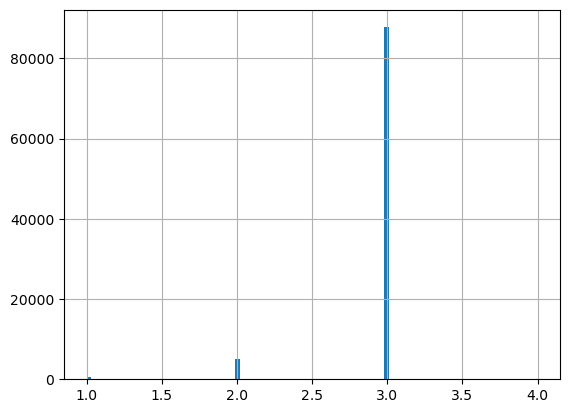

In [198]:
print(one_composite[var],one_composite[var].hist(bins=100))

In [199]:
one_composite.describe()

,Sample Number,Depth From,Depth To,X,Y,Z,Length,Ag_ppm,Al_pct,Ars_ppm,...,Tl_ppm,U_ppm,V_ppm,Vein1_Pct,Vein2_Pct,W_ppm,Weathering,Y_ppm,Zn_ppm,Zr_ppm
count,195284.000000,195284.000000,195284.000000,1.952840e+05,1.952840e+05,195284.000000,195284.000000,151962.000000,38150.000000,151854.000000,...,8190.000000,8190.000000,38631.000000,12933.000000,2221.000000,8190.000000,93828.000000,38148.000000,152393.000000,8190.000000
mean,97642.500000,233.090506,234.088661,3.498729e+06,7.512093e+06,14.552907,0.998156,-0.456335,1.430658,-3.676108,...,0.167940,1.190391,73.058827,2.361637,0.368501,1.007989,2.930464,3.222857,25.493274,49.140652
std,56373.779322,216.476215,216.476337,7.906781e+02,6.571315e+02,208.103886,0.033100,1.333952,2.072510,39.892207,...,0.256434,2.287623,84.187057,6.311369,0.899373,2.777718,0.279870,5.483131,50.417990,46.207008
min,1.000000,0.000000,1.000000,3.492850e+06,7.508932e+06,-1460.400000,0.025000,-1.000000,0.000000,-30.000000,...,-0.020000,-0.100000,1.100000,0.000000,0.000000,-0.100000,1.000000,0.000000,-2.000000,0.700000
25%,48821.750000,68.000000,69.000000,3.498678e+06,7.511784e+06,-81.720000,1.000000,-1.000000,0.370000,-10.000000,...,0.030000,0.100000,20.900000,0.300000,0.010000,0.100000,3.000000,0.300000,13.000000,18.247500
50%,97642.500000,179.000000,180.000000,3.498905e+06,7.512214e+06,69.510000,1.000000,-1.000000,0.550000,-10.000000,...,0.070000,0.300000,40.500000,1.000000,0.100000,0.300000,3.000000,0.790000,22.300000,30.100000
75%,146463.250000,337.000000,338.000000,3.499105e+06,7.512441e+06,171.890000,1.000000,0.040000,1.280000,0.000000,...,0.180000,1.600000,94.300000,2.000000,0.300000,0.800000,3.000000,3.560000,31.900000,73.900000
max,195284.000000,1714.000000,1714.700000,3.500197e+06,7.514650e+06,266.650000,1.000000,237.000000,10.250000,6030.000000,...,2.190000,45.100000,4280.000000,100.000000,10.000000,43.140000,4.000000,63.900000,5110.000000,389.000000


#### Columns

Just the columns I didn't understand

[Gangue_Min, Interval_Length, Length*, Core_Angle**, Core_Diameter***, Dataset, Dest, Gamma_uRh, Gangue_Min,
Interval_Length, Ja****, Jn, Jr, Logged_By^, Ore_Type, Ori_Confidence, Reading_den, Reading_susc, 
Recovery_m, Recovery_Pct, Res_Wenner_ohmm, RQD_m, RQD_Pct, SulphTot_pct, Susc_SI, Vein1_Comp]



#### Questions:

1) Why are the Name of the holes different from the ones I have in a different dataset?
2) Why are there Alt1 and Alt2 cols, what's Int, Style, same question for Lith, Min, Sulph, Vein
3) Could the comments be useful?
4) Density and density_gcm3 are slightly different??
5) ^Companies, people, tool?
6) Orig_Lith diff to lith?
7) What are the "Proportion (...)"?
8) What do the 0 and 1 values mean for samp_id? Is it identical to SampleID?
9) Vein1_Comp, pct, style etc? 
10) What do the 2 and 3 mean in Weathering, why does it have also some odd values that are diff

#### Notes:

1) *Length is in the list because I don't understand how all the values are not 1
2) **Core_Angle goes from 0 to 90 
3) ***Core_Diameter is just 0s 
4) ****Ja mostly discrete values, same with Jn, Jr

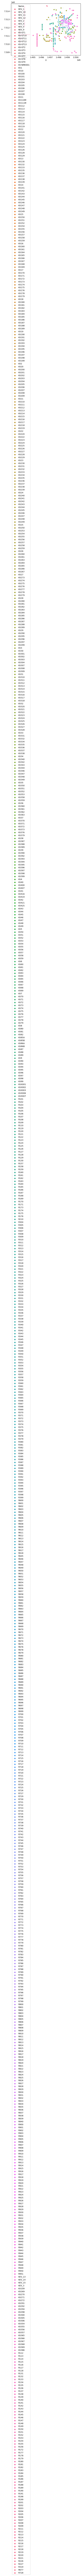

In [211]:

x = one_composite['X']
y = one_composite['Y']
z = one_composite['Name']
f, ax = pl.subplots()

sns.scatterplot(x=x, y=y, hue=z)

pl.show()
